<a href="https://colab.research.google.com/github/CescaNeri/asai-er-ml/blob/main/ASAI_ER_2023_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio di programmazione Python

Questa lezione di laboratorio ha l'obiettivo di farvi prendere pratica con le due librerie più usate in ambito Machine Learning/AI:
1. La libreria [**NumPy**](https://numpy.org/), standard de facto per il calcolo matriciale;
2. La libreria [**scikit-learn**](https://scikit-learn.org/stable/), contenente l'implementazione di un tanti algoritmi di Machine Learning pronti all'uso.

La conoscenza di queste librerie è assolutamente fondamentale nel Machine Learning moderno.

Per nostra fortuna entrambe le librerie sono semplici da utilizzare. In aggiunta, è spesso sufficiente l'uso di queste due sole librerie per poter affrontare molti problemi pratici che richiedono l'apprendimento automatico.

Il laboratorio è diviso in due parti in cui vedremo queste librerie in sequenza, cominciando da *NumPy*.

# Contatti
Per maggiori info riguardanti l'esercitazione potete contattarmi all'indirizzo (l.pellegrini@unibo.it). Sito istituzionale: https://www.unibo.it/sitoweb/l.pellegrini

## NumPy
NumPy è una libreria del linguaggio Python che permette di definire e manipolare vettori e matrici multidimensionali.

Per via della sua facilità d'uso e del gran numero di operazioni messe a disposizione *out-of-the-box*, NumPy è diventato un punto di riferimento per qualsiasi applicazione di tipo scientifico. Questa libreria nasce con l'intento di sopperire alle mancanze delle strutture dati messe a disposizione nativamente da Python che risultano poco adatte ad applicazioni matematiche.

### Import

Per prima cosa è necessario eseguire l'import del relativo modulo.

La libreria viene convenzionalmente importata con il nome **np**. L'uso di nomi abbreviati per alcune librerie comuni (NumPy -> np, Matplotlib -> plt, ...) è uno standard ufficioso ma seguito da "tutti". Difficilmente incontrerete (su StackOverflow, forum, GitHub, ...) codice NumPy in cui NumPy non viene importato come *np*.

In [1]:
import numpy as np

### Array

L'obiettivo di NumPy è quello di fornire strumenti per eseguire calcolo matriciale/vettoriale in maniera semplice ed efficiente.

NumPy permette la creazione di **ndarray** (*n-dimensional array*), ovvero liste contenenti esclusivamente elementi dello stesso tipo. Al contrario, le liste di Python possono contenere elementi eterogenei (interi, stringhe, ...), cosa che le rende poco adatte al calcolo matriciale.

Tramite gli *ndarray*, NumPy è in grado di memorizzare i dati con un uso di memoria ottimale. Inoltre, le operazioni aritmetiche e di manipolazione dei dati messe a disposizione risultano essere particolarmente ottimizzate essendo di fatto implementate in C++.

Nota: Python è un linguaggio terribilmente lento. Tuttavia, le librerie mainstream in ambito ML/AI (NumPy, scikit-learn, PyTorch, TensorFlow, ...) demandano tutti i calcoli onerosi a una implementazione scritta in un liguaggio di basso livello (C++, Rust, Assembler, ...).

L'inizializzazione di un **ndarray** è affidata alla funzione **array(...)**. Nella sua versione base la funzione accetta come parametro una lista di valori.

In [2]:
# Definisce un vettore contenente gli elementi da 0 a 5
vector = np.array([0, 1, 2, 3, 4, 5])
print(type(vector))
print('Contenuto di vector:', vector)

<class 'numpy.ndarray'>
Contenuto di vector: [0 1 2 3 4 5]


### List vs ndarray

Per comparazione, proviamo a eseguire la print del tipo e contenuto di una lista Python:

In [3]:
# Definisce una lista contenente gli elementi da 0 a 5
native_list = [0, 1, 2, 3, 4, 5]
print(type(native_list))
print('Contenuto di native_list:', native_list)

<class 'list'>
Contenuto di native_list: [0, 1, 2, 3, 4, 5]


Possiamo notare che il tipo è diverso ('list' vs 'numpy.ndarray') e che la print formatta in maniera leggermente diversa l'output.

Tuttavia per certi aspetti l'ndarray è molto simile a una lista Python, tanto che in alcune situazioni potrebbero essere intercambiabili.

Vediamo i principali elementi di similarità e differenza:
1. Entrambi supportano la funzione `len(...)` per ottenerne la lunghezza:

In [4]:
print('Lunghezza lista Python:', len(native_list))
print('Lunghezza array NumPy:', len(vector))

Lunghezza lista Python: 6
Lunghezza array NumPy: 6


2. Possiamo accedere agli elementi della lista/array con la stessa sintassi:

In [5]:
# Accesso in lettura (vedi in seguito per la scrittura)
print(native_list[0])
print(vector[0])

0
0


3. Stessa sintssi per il ciclo for:

In [6]:
print('Contenuto lista Python:')
for element in native_list:
  print(element)

print('Contenuto array NumPy:')
for element in vector:
  print(element)

Contenuto lista Python:
0
1
2
3
4
5
Contenuto array NumPy:
0
1
2
3
4
5


Pertanto, finche si tratta di usare un array (monodimensionale) o una lista Python in un codice che accede ai dati in sola lettura, la sintassi da utilizzare è la stessa.

Le cose si complicano in due casi:
- Accesso in scrittura
- Array multidimensionali

In questi casi le strade si biforcano ed è necessario trattare liste e array in maniera diversa.

Iniziamo dal caso dell'accesso in scrittura. Per alcune operazioni la sintassi è la stessa:

In [7]:
# Accesso in scrittura: sovrascriviamo un int
native_list[0] = 7
vector[0] = 7

print(native_list)
print(vector)

[7, 1, 2, 3, 4, 5]
[7 1 2 3 4 5]


Tuttavia gli array NumPy possono contenere elementi solamente dello stesso tipo:

In [8]:
native_list[1] = 'mela'  # OK
native_list[2] = 0.2     # OK
print(native_list)

# Se l'array NumPy è stato creato per contenere interi, non è possibile inserire altro se non interi
# vector[1] = 'mela'     # <<<--- ERRORE!
# vector[2] = 0.2        # <<<--- NO ERRORE, MA MEMORIZZERÀ "0", non "0.2"

[7, 'mela', 0.2, 3, 4, 5]


Gli ndarray hanno un'altra forte limitazione: hanno dimensione fissa. Una volta creati, non è possibile espanderli o ridurli.

Vedremo in seguito operazioni in grado di aggiungere elementi a un array, ma in realtà si tratta di operazioni che creano un nuovo array.

In [13]:
native_list.append(11)  # OK
print(native_list)

# vector.append(1)       # <<<--- ERRORE!

[7, 'mela', 0.2, 3, 4, 5, 11, 11, 11, 11, 11]


### Array multidimensionali

La grande differenza tra liste e array è la possibilità di manipolare dati in forma matriciale (bi-dimensionali) o addirittura n-dimensionali.

Le liste Python potrebbero essere utilizzate per memorizzare una matrice innestando liste.

Ad esempio, qui di seguito definiamo una lista contenente due liste di 3 elementi. Possiamo interpretare `matrix_using_lists` come una matrice 2x3 (due righe, tre colonne).

In [14]:
matrix_using_lists = [[0, 1, 2], [3, 4, 5]]

print(matrix_using_lists)

[[0, 1, 2], [3, 4, 5]]


Tuttavia innestare liste Python è poco efficiente e non fornisce le garanzie che ci vengono fornite da NumPy: 1) che i dati siano sempre dello stesso tipo e 2) che le sotto-liste abbiano lo stesso numero di elementi. Inoltre la print potrebbe diventare particolarmente confusionaria con matrici di grandi dimensioni o con tensori con più di 2 dimensioni.

Possiamo creare un array NumPy bi-dimensionale a partire da liste innestate utilizzando la funzione *array(...)* vista in precedenza:

In [15]:
matrix = np.array(matrix_using_lists)

print(matrix)

[[0 1 2]
 [3 4 5]]


Si noti come la print sia in grado di formattare l'output in una maniera più semplice da leggere.

Nota: in caso di matrici di grandi dimensioni, i valori delle colonne e delle righe intermedie verranno omessi e al loro posto verranno visualizzati dei puntini di sospensione `...`.

NumPy tenterà di capire automaticamente qual è il tipo di dato della matrice. Nella cella precedente ha creato un array di interi. Nella cella seguente ad esempio passiamo un mix di interi e numeri floating point: in questo caso NumPy creerà un array di numeri floating point, di fatto convertendo gli int in float. Possiamo capire il tipo di dato in uso accedendo al campo `dtype`.



In [16]:
matrix = np.array([[0, 1.1, 2], [3, 4, 5.3]])

print(matrix)
print(matrix.dtype)

[[0.  1.1 2. ]
 [3.  4.  5.3]]
float64


In alternativa, possiamo forzare il tipo del dato da utilizzare:

In [17]:
x = np.array([1, 2], dtype=np.int64)  # Forza un tipo di dati
print(x)
print(x.dtype)

[1 2]
int64


Oltre ad *array(...)*, che comunque richiede come input liste Python opportunamente annidate, è comune usare altri metodi per inizializzare un array. Questi metodi accettano come input il numero di righe e colonne di cui deve essere composta la matrice. Nella cella seguente sono riportati i più comuni.

Nota: se non forziamo il tipo di dato passando il parametro `dtype`, queste funzioni restituiscono array contenenti numeri floating point. `np.full(...)` è un'eccezione, potendo capire dal secondo parametro quale tipo è meglio usare.

In [18]:
# Dichiarazione di una matrice 2x2 inizializzata con tutti gli elementi a 0
a = np.zeros((2,2))
print('Zeros:\n', a)
print()

# Dichiarazione di una matrice 1x2 inizializzata con tutti gli elementi a 1
b = np.ones((3,2))
print('Ones:\n', b)
print()

# Dichiarazione di una matrice 2x2 inizializzata con tutti gli elementi a un valore costante
c = np.full((2,2), 7)
print('Full:\n', c)
print()

# Dichiarazione di una matrice identità 3x3
d = np.eye(3)
print('Eye:\n', d)
print()

# Dichiarazione di una matrice 4x3 contenete valori casuali
e = np.random.random((4,3))
print('Random:\n', e)

Zeros:
 [[0. 0.]
 [0. 0.]]

Ones:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]

Full:
 [[7 7]
 [7 7]]

Eye:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Random:
 [[0.4307884  0.84112123 0.59458997]
 [0.23090616 0.62184494 0.54630385]
 [0.22813602 0.3811697  0.84255667]
 [0.01819667 0.18773088 0.52176844]]


È possibile accedere agli elementi di un array n-dimensionale sia in lettura che in scrittura con la sintassi vista per il caso mono-dimensionale.

In [19]:
# Accesso in lettura
element = matrix[0][2]  # Elemento alla prima riga, terza colonna
print(element)

# Accesso in scrittura
matrix[0][1] = 70.0
print(matrix)

2.0
[[ 0.  70.   2. ]
 [ 3.   4.   5.3]]


È anche disponibile una sintassi più diretta, non disponibile nelle liste native Python.

In [20]:
# Accesso in lettura, sintassi "diretta"
element = matrix[0, 2]
print(element)

# Accesso in scrittura
matrix[1, 0] = 15.0
print(matrix)

2.0
[[ 0.  70.   2. ]
 [15.   4.   5.3]]


Infine, prima di addentrarci in argomenti più complessi, è bene sapere che è possibile ottenere una lista Python a partire da un array NumPy utilizzando il metodo `.tolist()`. In certi casi, potrebbe aver senso trasformare una lista in array NumPy, eseguire le operazioni necessarie, e poi ri-trasformare il tutto in lista. Questo potrebbe essere utile anche solo per demandare certe operazioni particolarmente complicate a NumPy. Vedremo infatti a breve come NumPy permetta di eseguire operazioni complesse in una sola riga, dove utilizzando liste Python sarebbero necessare decine di righe di codice.

In [21]:
matrix_as_list = matrix.tolist()

print(matrix_as_list)

[[0.0, 70.0, 2.0], [15.0, 4.0, 5.3]]


### Slicing
Lo slicing può essere applicato esattamente come per le liste Python. Per prima cosa ripassiamo come funziona lo slicing nelle liste Python.

La sintassi è `my_list[a:b]` dove `a` è l'indice da cui iniziare a selezionare la sotto-lista, mentre `b` è l'indice finale (escluso).

Nota: è possibile omettere `a` per ottenere la sotto-lista partendo dal primo elemento, oppure è possibile omettere `b` per prendere tutti gli elementi fino alla fine.

In [22]:
complete_list = [0, 1, 2, 3, 4, 5]
print(complete_list)

sublist = complete_list[1:4]  # Ricordate: indice finale escluso!
print(sublist)

[0, 1, 2, 3, 4, 5]
[1, 2, 3]


In NumPy possiamo ottenere sotto-array utilizzando lo slicing sia per array monodimensionali che N-dimensionali:

In [25]:
print('Caso monodimensionale. Vettore di partenza:')
print(vector)  # Creato in precedenza

sub_vector = vector[1:4]  # Sintassi identica al caso liste Python
print('Risultato slicing monodimensionale:')
print(sub_vector)

print('Caso bidimensionale. Matrice di partenza:')
print(matrix)  # Creato in precedenza

sub_matrix = matrix[1:, :2]
print('Risultato slicing bidimensionale:')
print(sub_matrix)

# sub_list = complete_list[1:, :2]
# print('Risultato slicing bidimensionale sulla lista')
# print(sub_list)

Caso monodimensionale. Vettore di partenza:
[7 1 2 3 4 5]
Risultato slicing monodimensionale:
[1 2 3]
Caso bidimensionale. Matrice di partenza:
[[ 0.  70.   2. ]
 [15.   4.   5.3]]
Risultato slicing bidimensionale:
[[15.  4.]]


Si noti, nel caso bi-dimensionale, come lo slicing vada a resisituire comunque un array bi-dimensionale. Nell'esempio precedente `sub_matrix` è una matrice di dimensione 1x2, non un vettore monodimensionale di dimensione 2. Questo si può notare dalle parentesi quadrate `[` e `]` doppie. Vedremo a breve il campo `shape`, che ci permetterà di verificare più facilmente le dimensioni di un array.

Nota: usare la sintassi `matrix[1:, :2]` porta a un risultato diverso da `matrix[1:][:2]`. Riuscite a capire perchè?

**Nota importante**: l'array risultante da uno slicing *solitamente* condivide la memoria con l'array originale, come dimostrato nella cella seguente:

In [26]:
# Uno slice crea una vista, non una copia dei dati
# Modificare uno slice equivale a modificare l'ndarray originale
my_matrix = np.array([[0, 1, 2], [3, 4, 5]])
print('Matrice originale')
print(my_matrix)

sliced_matrix = my_matrix[1:, :2]
print('Slice')
print(sliced_matrix)

sliced_matrix[0, 1] = 77  # Modifico lo slice

print(my_matrix[1, 1])
print(sliced_matrix[0, 1])

Matrice originale
[[0 1 2]
 [3 4 5]]
Slice
[[3 4]]
77
77


### Rank e shape
Fino ad ora abbiamo creato ed utilizzato array mono- e bi-dimensionali. Tuttavia NumPy è in grado di manipolare tensori di un numero arbitrario di dimensioni. Per fare un po' di chiarezza, introduciamo i termini *rank* e *shape*.

Si definisce **rank** il numero di dimensioni di un array.
Si definisce **shape** una tupla di interi che esprimono la lunghezza di ciascuna dimensione.

Per comprendere meglio questo concetto si consideri l'array *vector* definito in precedenza: si tratta di un array di *rank* `1` (cioè monodimensionale) e *shape* `(6,)` (cioè contenente 6 elementi). Si noti come `(6,)` sia una tupla di un solo elemento (perchè il rank è 1).

Allo stesso tempo, la matrix definita in precedenza è un array di *rank* `2` (bidimensionale, cioè una matrice) e *shape* `(2, 3)` (cioè 2 righe e 3 colonne).

Per ottenere la *shape* di un ndarray è sufficiente accedere al relativo attributo. Possiamo calcolare il rank come il numero di elementi nella shape, come mostrato nella cella seguente:

In [27]:
print('Contenuto di vector:')
print(vector)
print('Shape di vector :', vector.shape)
print('Rank di vector:', len(vector.shape))

print('Contenuto di matrix:')
print(matrix)
print('Shape di matrix :', matrix.shape)
print('Rank di matrix:', len(matrix.shape))

Contenuto di vector:
[7 1 2 3 4 5]
Shape di vector : (6,)
Rank di vector: 1
Contenuto di matrix:
[[ 0.  70.   2. ]
 [15.   4.   5.3]]
Shape di matrix : (2, 3)
Rank di matrix: 2


## Manipolazione dei dati

Gli array NumPy sono a dimensione e tipo di dato fissi. Una volta creati, non è possibile ridimensionarli. Tuttavia, NumPy mette a disposizione alcune funzionalità per ottenere un nuovo ndarray a cui sono state aggiunte o rimosse righe, colonne, ... o è stato cambiato tipo. Queste funzioni non modificano l'ndarray originale.

Abbiamo già visto lo slicing, che ci permette di ottenere un ndarray contenente un sotto-insieme di righe o colonne (pur condividento la memoria con l'ndarray originale). Le funzioni seguenti invece vanno ad aggiungere elementi alla dimensione voluta.

### Concatenate

La funzione **concatenate** è utilizzata per aggiungere righe o colonne. A `concatenate` deve essere passata una lista di array da concatenare. Se non vengono passati ulteriori parametri, viene eseguita una concatenazione di righe.

In [28]:
arr1 = np.array([[0, 1], [2, 3]])
arr2 = np.array([[4, 5]])

arr_concat = np.concatenate((arr1, arr2))
print('arr_concat:\n', arr_concat)

arr_concat:
 [[0 1]
 [2 3]
 [4 5]]


Tuttavia, è possibile concatenare una colonna passando `axis=1`. Il secondo array deve avere shape compatibile. Nell'esempio seguente concateniamo una matrice 2x2 con un vettore colonna (ovvero una matrice 2x1)

In [29]:
arr1 = np.array([[0, 1], [2, 3]])
arr2_column = np.array([[4], [5]])

print('arr2_column:\n', arr2_column)

arr_concat_column = np.concatenate((arr1, arr2_column), axis=1)
print('arr_concat_column:\n', arr_concat_column)

arr2_column:
 [[4]
 [5]]
arr_concat_column:
 [[0 1 4]
 [2 3 5]]


Infine, possiamo ottenere un ndarray di un tipo diverso da quello di partenza utilizzando **astype**:

In [30]:
arr1 = np.array([[0, 1], [2, 3]])
arr1_float = arr1.astype(float)

print(arr1_float)

[[0. 1.]
 [2. 3.]]


### Reshape
Un **ndarray** può essere manipolato in maniera tale da poter creare un array con *shape* differente a partire dal contenuto iniziale.

Nell'esempio che segue *vector* è trasformato nell'equivalente vettore colonna utilizzando la funzione **reshape(...)**.

In [31]:
# Trasformazione in vettore colonna
mono_dimensional_vector = np.array([1, 2, 3, 4, 5, 6])
column_vector = mono_dimensional_vector.reshape((6, 1))

print('Contenuto di column_vector:\n', column_vector)

# Nota: l'array originale non è stato modificato
print('mono_dimensional_vector originale:', mono_dimensional_vector)

Contenuto di column_vector:
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
mono_dimensional_vector originale: [1 2 3 4 5 6]


Possiamo anche passare a reshape anche un singolo valore `-1` definendo solo le altre dimensioni.

In [32]:
column_vector = mono_dimensional_vector.reshape((-1, 1))

print('Contenuto di column_vector:\n', column_vector)

Contenuto di column_vector:
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


Possiamo anche ri-ottenere un array monodimensionale usando *reshape*:

In [33]:
back_to_mono = column_vector.reshape((6,))  # oppure (-1,)
print(back_to_mono)

[1 2 3 4 5 6]


### Altre operazioni

Esistono altre operazioni che possono essere molto comuni nella manipolazione dei dati, come stack [**np.stack**](https://numpy.org/doc/stable/reference/generated/numpy.stack.html) o [**np.flatten**](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

La [lista completa](https://numpy.org/doc/stable/reference/routines.array-manipulation.html) include operazioni che permettono di eseguire la stragrande maggioranza delle tranformazioni senza cicli e senza dover tornare a usare liste native Python.

## Operazioni algebriche

NumPy mette a disposizione le più comuni operazioni algebriche.

Queste operazioni funzionano in maniera simile sia per tutti gli array, a prescindere dal numero di dimensioni. Vedremo successivamente anche operazioni che hanno senso solo per i casi mono- e bi-direzionale.

Partiamo dalle operazioni più semplici.

Possiamo utilizzare gli operatori visti per le variabili numeriche (+, -, *, /, //, %) con gli ndarray. Quello che si ottiene è l'applicazione dell'operatore sui singoli elementi dell'array.

In [34]:
vector_add_5 = vector + 5
vector_sub_5 = vector - 5
vector_mul_5 = vector * 5
vector_div_5 = vector / 5  # Cambia il tipo di dato!
vector_div_5_int = vector // 5
vector_mod_5 = vector % 5

print('Vettore originale:\n', vector)
print('Addizione:\n', vector_add_5)
print('Sottrazione:\n', vector_sub_5)
print('Moltiplicazione:\n', vector_mul_5)
print('Divisione:\n', vector_div_5)
print('Divisione intera:\n', vector_div_5_int)
print('Resto divisione intera:\n', vector_mod_5)

Vettore originale:
 [7 1 2 3 4 5]
Addizione:
 [12  6  7  8  9 10]
Sottrazione:
 [ 2 -4 -3 -2 -1  0]
Moltiplicazione:
 [35  5 10 15 20 25]
Divisione:
 [1.4 0.2 0.4 0.6 0.8 1. ]
Divisione intera:
 [1 0 0 0 0 1]
Resto divisione intera:
 [2 1 2 3 4 0]


Lo stesso vale per array N-dimensionali:

In [35]:
matrix_add_5 = matrix + 5

print('Matrice originale:\n', matrix)
print('Somma:\n', matrix_add_5)

Matrice originale:
 [[ 0.  70.   2. ]
 [15.   4.   5.3]]
Somma:
 [[ 5.  75.   7. ]
 [20.   9.  10.3]]


Il medesimo risultato, utilizzando le liste, si potrebbe ottenere in maniera molto più complessa (e poco performante). Tuttavia, la complessità del codice può aumentare all'aumentare delle dimensioni, dell'operazione da eseguire, eccetera.

Di seguito un esempio:

In [36]:
matrix_as_list = [[0, 1, 2], [3, 4, 5]]
n_rows = 2
n_columns = 3

for r in range(n_rows):
  for c in range(n_columns):
    matrix_as_list[r][c] += 5

Conviene quindi manipolare dati vettoriali/matriciali sempre utilizzando NumPy.

NumPy permette anche di eseguire la somma e sottrazione tra array (e anche tra matrici o comunque array N-dimensionali):

In [38]:
vect1 = np.array([1,2,6])
vect2 = np.array([5,2,3])

# Somma tra vettori
vector_sum = vect1 + vect2

# Sottrazione tra vettori
vector_sub = vect1 - vect2

print('Somma:\n', vector_sum)
print('Sottrazione:\n', vector_sub)

Somma:
 [6 4 9]
Sottrazione:
 [-4  0  3]


Nota: l'operatore *'+'*, quando applicato a due liste "native" di Python, esegue una concatenazione. Tuttavia se lo stesso operatore viene applicato a due **ndarray** quella che si ottiene è una somma algebrica.

## Operazioni algebriche tra matrici
Come già accennato, le matrici possono essere rappresentate tramite **ndarray** di *rank* 2. Numpy mette a disposizione diverse funzioni frequentemente utilizzate nel calcolo matriciale quali: calcolo della trasposta, dell'inversa, del determinante, del prodotto tra matrici, ecc.

Nota: diverse funzioni di NumPy sono disponibili in duplice formato, ovvero `matrice.funzione(...)` e `np.funzione(matrice, ...)`. Solitamente sono esattamente la stessa funzione, ma è sempre meglio controllare la documentazione per essere certi.

Come piccolo suggerimento, è possibile distinguere (da Google) le pagine della documentazione per le due tipologie di formato semplicemente dal titolo:

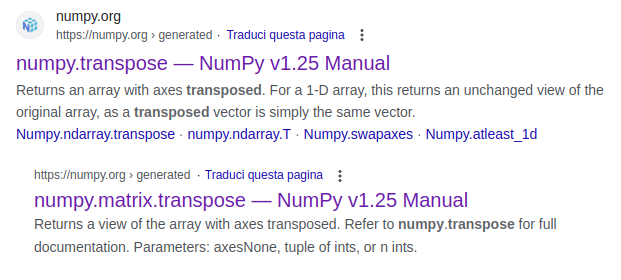

### Calcolo della trasposta
È possibile calcolare la trasposta di una matrice richiamando il metodo **.transpose(...)**, oppure utilizzando l'attributo **.T**.

In [39]:
matrix = np.array([[0,1,2], [3,4,5]])
print('Matrix:\n', matrix)

# Calcolo della trasposta
matrix_transp = matrix.transpose()
print('\nTrasposta di matrix:\n', matrix_transp)

# In maniera equivalente
matrix_transp = matrix.T
matrix_transp = np.transpose(matrix)

Matrix:
 [[0 1 2]
 [3 4 5]]

Trasposta di matrix:
 [[0 3]
 [1 4]
 [2 5]]


### Calcolo dell'inversa
È possibile calcolare l'inversa di una matrice utilizzando la funzione di libreria **np.linalg.inv(...)**.

In [40]:
# Definizione di una matrice quadrata
matrix2 = np.array([[12,-1,0],
                    [7,6,-5],
                    [1,6,9]])

# Calcolo dell'inversa
matrix2_inv = np.linalg.inv(matrix2)
print('Inversa matrix2:\n', matrix2_inv)

Inversa matrix2:
 [[ 0.07806691  0.00836431  0.00464684]
 [-0.06319703  0.10037175  0.05576208]
 [ 0.03345725 -0.06784387  0.07342007]]


### Calcolo del determinante
È possibile calcolare il determinante di una matrice utilizzando la funzione di libreria **np.linalg.det(...)**.

In [41]:
# Calcolo del determinante
matrix2_det = np.linalg.det(matrix2)
print('Determinante matrix2:', matrix2_det)

Determinante matrix2: 1076.0000000000002


### Moltiplicazione matriciale
La moltiplicazione matriciale è affidata al metodo **.dot(...)**. Questo metodo deve essere richiamato sulla matrice sinistra passando come parametro la matrice destra. In alternativa è possibile utilizzare la funzione di libreria **np.dot(...)** oppure l'operatore **@**.

Nota: ricordatevi che l'operatore `*` non esegue la moltiplicazione matriciale, ma bensì la moltiplicazione elemento a elemento! La moltiplicazione matriciale riga x colonna è una cosa diversa.

In [42]:
# Reminder: matrix = [[0,1,2],
#                      [3,4,5]]
#
#           matrix2 = [[12,-1,0],
#                      [7,6,-5],
#                      [1,6,9]]
print('matrix:\n', matrix)

print('\nmatrix2:\n', matrix2)

# Moltiplicazione matriciale tra le matrici "matrix1" e "matrix2"
mul1 = matrix.dot(matrix2)
print('\nMoltiplicazione tra matrici:\n', mul1)

# In maniera equivalente
mul2 = np.dot(matrix, matrix2)
mul2 = matrix @ matrix2

matrix:
 [[0 1 2]
 [3 4 5]]

matrix2:
 [[12 -1  0]
 [ 7  6 -5]
 [ 1  6  9]]

Moltiplicazione tra matrici:
 [[ 9 18 13]
 [69 51 25]]


### Operazioni avanzate
Di seguito sono elencate alcune delle operazioni avanzate messe a disposizione da Numpy.

La [documentazione ufficiale](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) di **ndarray** contiene la lista completa delle operazioni supportate.

#### Media e deviazione standard di un vettore
È possibile calcolare media e deviazione standard utilizzando i metodi **.mean(...)** e **.std(...)**.

In [43]:
print('matrix:\n', matrix)
print('Media:', matrix.mean())
print('Deviazione standard:', matrix.std())

matrix:
 [[0 1 2]
 [3 4 5]]
Media: 2.5
Deviazione standard: 1.707825127659933


### Trasformazione in scalare
È possibile ottenere uno scalare da un **ndarray** contenente un solo elemento (anche se l'array è N-dimensionale, N > 1).

In [44]:
single_element_array = np.array([[1]])

print('Scalare:', single_element_array.item())

Scalare: 1


#### Somma degli elementi
La somma degli elementi è affidata al metodo **.sum(...)** o alla funzione di libreria **np.sum(...)**.

In [45]:
# Somma degli elementi di un vettore
vector = np.array([0, 1, 2])
print(vector)
print('Somma:', vector.sum())
print()

# Reminder: matrix = [[0,1,2],
#                      [3,4,5]]
print('matrix:\n', matrix)
print()

# Somma degli elementi di una matrice
elements_sum = matrix.sum()
print('Somma:', elements_sum)

# Somma degli elementi di una matrice per riga
elements_row_sum = matrix.sum(axis=1)
print('Somma per riga:', elements_row_sum)

# Somma degli elementi di una matrice per colonna
elements_column_sum = matrix.sum(axis=0)
print('Somma per colonna:', elements_column_sum)

[0 1 2]
Somma: 3

matrix:
 [[0 1 2]
 [3 4 5]]

Somma: 15
Somma per riga: [ 3 12]
Somma per colonna: [3 5 7]


### Minimi e massimi di una matrice
Allo stesso modo è possibile ottenere i minimi e i massimi per riga o colonna utilizzando i metodi **.min(...)** e **.max(...)**. Anche per queste sono disponibili le funzioni di libreria **np.min(...)** e **np.max(...)**.

In [46]:
vector2 = np.array([0, 1, 2, 3, 4, 5])
print('vector2:', vector2)

print('Minimo:', vector2.min())
print('Massimo:', vector2.max())
print()

# Reminder: matrix = [[0,1,2],
#                      [3,4,5]]
print('matrix:\n', matrix)
print()

# Minimi delle righe di una matrice
mins = matrix.min(axis=1)
print('Minimi delle righe:', mins)

# Massimi delle colonne di una matrice
maxs = matrix.max(axis=0)
print('Massimi delle colonne:', maxs)

vector2: [0 1 2 3 4 5]
Minimo: 0
Massimo: 5

matrix:
 [[0 1 2]
 [3 4 5]]

Minimi delle righe: [0 3]
Massimi delle colonne: [3 4 5]


Se invece si desidera ottenere gli indici di tali elementi, è possibile utilizzare i metodi **.argmin(...)** e **.argmax(...)**.

In [47]:
# Indici posizionali dei minimi delle righe di una matrice
min_indices = matrix.argmin(axis=1)
print('Indici dei minimi:\n', min_indices)

# Indici posizionali dei massimi delle colonne di una matrice
max_indices = matrix.argmax(axis=0)
print('Indici dei massimi:\n', max_indices)

Indici dei minimi:
 [0 0]
Indici dei massimi:
 [1 1 1]


## Esercizio
Come """semplice""" esercizio, si implementi la funzione `compute_mean` che, presa una matrice di N righe, ne calcoli la "riga media" $\boldsymbol{\mu}$.

$\Large{\boldsymbol{\mu}=\frac{1}{n}\sum_{i=1..n}\boldsymbol{x}_i}$

Ad esempio, se l'input fosse la seguente matrice 4x3:
```
[0.0  1.0  2.1]
[5.2  7.2  9.9]
[0.0  8.0  0.1]
[5.0  0.7  0.3]
```

allora la riga media dovrebbe essere:
```
[2.55 5.225 3.1]
```

Il consiglio è di implementare la funzione in 2 modi diversi per comprendere le differenze tra i due approcci:

1. Implementando la formula così come si legge. Fatelo utilizzando un ciclo for che cicla sulle singole righe (la sommatoria). Dovrete tenervi traccia del vettore somma (inizialmente con valori inizializzati a 0.0). Una volta ottenuto il vettore somma, dovrete dividere per `n` (numero di righe). Per una prima versione, date per scontato che la matrice sia Nx3. Tuttavia, come si potrebbe creare il vettore somma non sapendo il numero di colonne nella matrice?
2. Implementando il calcolo del vettore medio utilizzando `np.mean`, come visto in precedenza.

In [72]:
exercise_input = np.array([
    [0.0, 1.0, 2.1],
    [5.2, 7.2, 9.9],
    [0.0, 8.0, 0.1],
    [5.0, 0.7, 0.3]
])

def compute_mean(input_matrix):

  sum_vector = input_matrix.sum(axis=0)

  result = []
  for x in sum_vector:
    result.append(x / input_matrix.shape[0])

  mean_mat = np.array(result)
  return mean_mat

print(compute_mean(exercise_input))


def mean_fast(input_matrix):
  return input_matrix.mean(axis=0)

print(mean_fast(exercise_input))

[2.55  4.225 3.1  ]
[2.55  4.225 3.1  ]


Questo conclude la parte riguardante NumPy. Utilizzeremo NumPy nella seconda parte del laboratorio, che riguarderà **scikit-learn**. Scikit-learn usa NumPy come formato per la manipolazione dei dati, per cui gli input e gli output che passeremo alle funzioni offerte da scikit-learn dovranno essere ndarray.

Si noti che NumPy è onnipresente nel Machine Learning, nella Data Science, etc. Scikit-learn infatti non è l'unico framework ad utilizzare NumPy come metodo per la manipolazione dei dati. Librerie come Matplotlib (solitamente utilizzata per visualizzare dei risultati), PIL (manipolazione di immagini), scikit-image (strumenti per ML su immagini), TensorFlow e PyTorch (Deep Learning) si interfacciano direttamente con NumPy.

# Seconda parte
La seconda parte dell'esercitazione è disponibile qui: https://colab.research.google.com/drive/1-Je3u4hMMJCcbceTDibmy-nCcooZgZGg?usp=sharing